In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rc('axes', titlesize=30) #fontsize of the title
plt.rc('axes', labelsize=20) #fontsize of the x and y labels

In [3]:
# Data is imported
df = pd.read_csv("comber_calib_cut.csv", header=5, sep="\s+|\t+|\s+\t+|\t+\s+")  # sep is in that way to skip any number of whitespaces.

# Double quotes are removed
df.rename(columns = {'"id':'id', 'ar"':'ar'}, inplace = True)
df['id'] = df['id'].apply(lambda x : str(x.strip('"')))  # id's will be strings
df['ar'] = df['ar'].apply(lambda x : float(x.strip('"')))

C:\Users\vikap\AppData\Local\Temp\ipykernel_18828\2436877073.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("comber_calib_cut.csv", header=5, sep="\s+|\t+|\s+\t+|\t+\s+")  # sep is in that way to skip any number of whitespaces.


In [4]:
df

,id,ra,dec,g,gerr,r,rerr,chi,sharp,rd,l,b,egr,ag,ar
0,10100003,12.447312,23.907527,24.3179,0.0195,23.8523,0.0136,1.0030,-0.0490,1.846,241.707,83.585,0.0180,0.0655,0.0475
1,10100005,12.447323,23.892127,25.1297,0.0368,24.2765,0.0205,1.0546,0.6885,2.350,241.825,83.577,0.0177,0.0646,0.0468
2,10100006,12.447303,23.923080,26.0262,0.1231,26.0150,0.0691,0.9873,-0.5051,1.732,241.587,83.593,0.0182,0.0662,0.0480
3,10100009,12.447394,23.794176,21.8796,0.0035,21.6566,0.0037,1.0722,-0.0589,7.677,242.570,83.526,0.0174,0.0634,0.0460
4,10100010,12.447456,23.721257,25.2733,0.0780,24.8299,0.0692,1.0343,-0.2550,11.981,243.117,83.487,0.0187,0.0680,0.0493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468368,43202664,12.415582,23.991854,24.4273,0.1016,24.9415,0.1078,1.2900,-0.1455,28.156,239.159,83.251,0.0213,0.0774,0.0562
468369,43202668,12.415611,23.953061,24.2112,0.0872,24.1556,0.0841,1.5450,0.3005,27.866,239.448,83.233,0.0212,0.0773,0.0561
468370,43202680,12.415555,23.992610,23.4898,0.0499,23.6784,0.0461,1.6085,-0.1065,28.185,239.152,83.251,0.0213,0.0774,0.0561
468371,43202680,12.415469,24.071748,23.4464,0.0423,23.5796,0.0466,1.5130,0.2070,29.372,238.555,83.288,0.0202,0.0736,0.0534


Some first ideas:
* Since there are objects with more than 1 detection, the **mean** of each column for each object will be taken so we have a dataframe with unique id's.
* Add column with colors (difference between bands: g-r)

In [5]:
df_mean = df.groupby('id').apply(lambda df_aux: df_aux.mean()).reset_index(drop=True)

In [6]:
df_mean.insert(7, 'g-r', df_mean.g - df_mean.r, True)

In [7]:
df_mean[:10]

,id,ra,dec,g,gerr,r,rerr,g-r,chi,sharp,rd,l,b,egr,ag,ar
0,10100003.0,12.447312,23.907527,24.3179,0.0195,23.8523,0.0136,0.4656,1.0030,-0.0490,1.846,241.707,83.585,0.0180,0.0655,0.0475
1,10100005.0,12.447323,23.892127,25.1297,0.0368,24.2765,0.0205,0.8532,1.0546,0.6885,2.350,241.825,83.577,0.0177,0.0646,0.0468
2,10100006.0,12.447303,23.923080,26.0262,0.1231,26.0150,0.0691,0.0112,0.9873,-0.5051,1.732,241.587,83.593,0.0182,0.0662,0.0480
3,10100009.0,12.447394,23.794176,21.8796,0.0035,21.6566,0.0037,0.2230,1.0722,-0.0589,7.677,242.570,83.526,0.0174,0.0634,0.0460
4,10100010.0,12.447456,23.721257,25.2733,0.0780,24.8299,0.0692,0.4434,1.0343,-0.2550,11.981,243.117,83.487,0.0187,0.0680,0.0493
5,10100011.0,12.447438,23.752101,24.9529,0.0445,24.5453,0.0422,0.4076,1.0254,0.5921,10.152,242.887,83.504,0.0181,0.0657,0.0477
6,10100012.0,12.447318,23.931639,24.0754,0.0154,23.3495,0.0108,0.7259,1.1375,0.9665,1.860,241.523,83.597,0.0183,0.0665,0.0483
7,10100025.0,12.447467,23.752644,25.3646,0.0945,25.2447,0.1062,0.1199,1.1005,0.5673,10.116,242.885,83.504,0.0180,0.0657,0.0476
8,10100028.0,12.447348,23.941886,25.5723,0.0683,25.4426,0.0594,0.1297,0.9940,0.3329,2.162,241.446,83.603,0.0184,0.0669,0.0485
9,10100030.0,12.447477,23.754592,25.6717,0.0849,25.3565,0.0790,0.3152,1.0352,0.4955,9.999,242.871,83.506,0.0180,0.0655,0.0475


### **H-R Diagram**

#### First, the diagram for all distances is presented

In [17]:
def plot_hrd(df):
    x_data = df['g-r']
    y_data = df['g']
    
    fig, ax = plt.subplots(figsize=(10,9))
    ax.scatter(x_data, y_data, s=.0001, c='k')#, alpha=0.1)
    ax.set_title('H-R Diagram')
    ax.set_ylabel('G')
    #ax.set_xlim((-2, 2))
    ax.set_ylim(ax.get_ylim()[::-1])

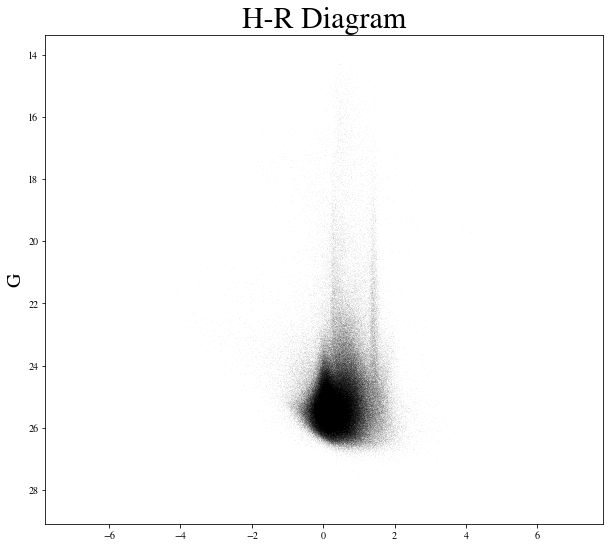

In [22]:
plot_hrd(df_mean)

#### Plotting for different distances in the cluster

Two regions will be chosen: one from the center of the cluster to a certain radius, and the other from that radius to the exterior.

In [39]:
def plot_hrd_radius(df, radius):
    df_inner = df.loc[df.rd < radius]
    x_inner = df_inner['g-r']
    y_inner = df_inner['g']
    
    df_outer = df.loc[df.rd >= radius]
    x_outer = df_outer['g-r']
    y_outer = df_outer['g']

    fig, ax = plt.subplots(1, 2, figsize=(20,9))
    ax[0].scatter(x_inner, y_inner, s=.0001, c='k')#, alpha=0.1)
    ax[1].scatter(x_outer, y_outer, s=.0001, c='k')#, alpha=0.1)
    #ax[0].set_title('H-R Diagram for r<')#+ str(radius))
    #ax[1].set_title('H-R Diagram for r>')#+ str(radius))
    ax.set_ylabel('G')
    #ax.set_xlim((-2, 2))
    ax.set_ylim(ax.get_ylim()[::-1])

AttributeError: 'int' object has no attribute 'items'

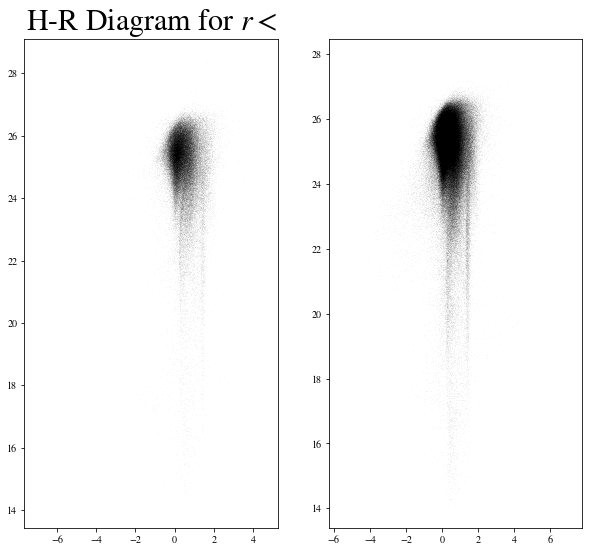

In [42]:
r_inner = 30
plot_hrd(df_mean, r_inner)